# Correlação de Fase

A correlação de fase diz que, se calcularmos a Transformada Discreta de Fourier de duas imagens $f$ and $h$:

$$ F = \mathcal{F}(f); $$$$ H = \mathcal{F}(h) $$

E em seguida calcularmos a correlação $R$ das transformadas: 
$$ R = \dfrac{F H^*}{|F H^*|} $$

Depois, aplicarmos a transformada inversa a $R$
$$ g = \mathcal{F}^{-1}(R) $$

A translação entre as duas imagens pode ser encontrada fazendo-se:
$$ (row, col) = arg max\{g\} $$


## Identificando a translação entre 2 imagens

1. Calcular a Transformada de Fourier das 2 imagens que se quer comparar;
2. Calcular a correlação de fase usando a função *phasecorr*
3. Encontrar o ponto de máximo do mapa de correlação resultante

In [152]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from numpy.fft import *
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia


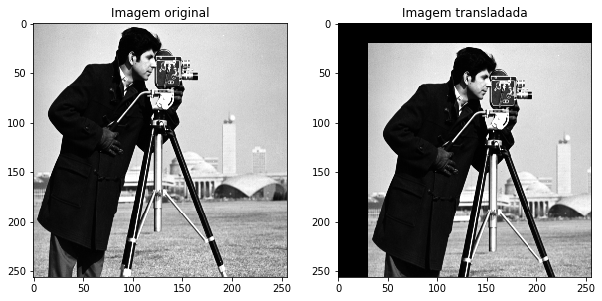

In [153]:
f = mpimg.imread('../data/cameraman.tif')

# Transladando a imagem para (x,y)
x = 20
y = 30

#f_trans = ia.ptrans(f,(20,30))
f_trans = np.zeros(f.shape)
f_trans[x:,y:] = f[:-x,:-y]

plt.figure(1,(10,10))
plt.subplot(1,2,1)
plt.imshow(f, cmap='gray')
plt.title('Imagem original')

plt.subplot(1,2,2)
plt.imshow(f_trans, cmap='gray')
plt.title('Imagem transladada')

In [154]:
# Calculando a correlação de fase
g = ia.phasecorr(f,f_trans)

# Encontrando o ponto de máxima correlação 
i = np.argmax(g)
row,col = np.unravel_index(i,g.shape)
v = np.array(f.shape) - np.array((row,col))
print('Ponto de máxima correlação: ',v)

Ponto de máxima correlação:  [20 30]


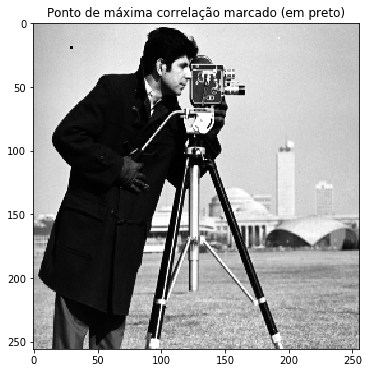

In [155]:
plt.figure(2,(6,6))
f[v[0]-1:v[0]+1,v[1]-1:v[1]+1] = 0
plt.imshow(f, cmap='gray')
plt.title('Ponto de máxima correlação marcado (em preto)')

## Identificando a rotação entre 2 imagens

1. Calcular a Transformada de Fourier das 2 imagens que se quer comparar;
2. Converter as imagens obtidas para coordenadas polares 
3. Calcular a correlação de fase usando a função *phasecorr*
4. Encontrar o ponto de máximo do mapa de correlação resultante

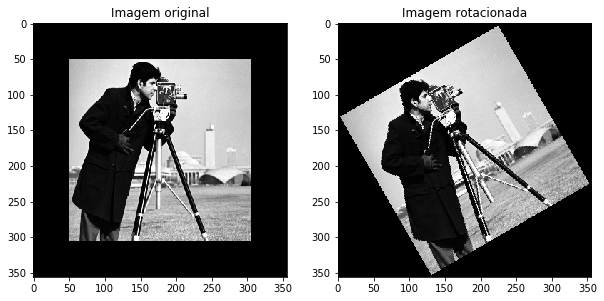

In [156]:
f = mpimg.imread('../data/cameraman.tif')

# Inserindo uma borda de zeros para permitir a rotação da imagem
t = np.zeros(np.array(f.shape)+100,dtype=np.uint8)
t[50:f.shape[0]+50,50:f.shape[1]+50] = f
f = t
    
t1 = np.array([
             [1,0,-f.shape[0]/2.],
             [0,1,-f.shape[1]/2.],
             [0,0,1]]);

t2 = np.array([
             [1,0,f.shape[0]/2.],
             [0,1,f.shape[1]/2.],
             [0,0,1]]);

# Rotacionando a imagem 30 graus
theta = np.radians(30)
r1 = np.array([
        [np.cos(theta),-np.sin(theta),0],
        [np.sin(theta),np.cos(theta),0],
        [0,0,1]]);
    
T = t2.dot(r1).dot(t1)
f_rot = ia.affine(f,T,0)

plt.figure(1,(10,10))
plt.subplot(1,2,1)
plt.imshow(f, cmap='gray')
plt.title('Imagem original')

plt.subplot(1,2,2)
plt.imshow(f_rot, cmap='gray')
plt.title('Imagem rotacionada')

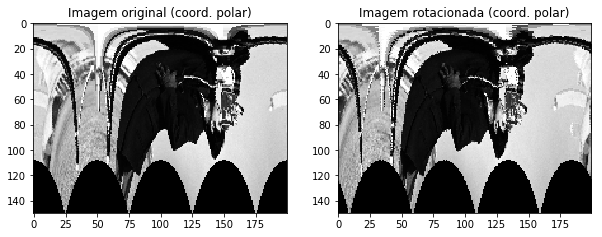

In [159]:
W,H = f.shape
f_polar = ia.polar(f,(150,200),2*np.pi)
f_rot_polar = ia.polar(f_rot,(150,200),2*np.pi)

plt.figure(1,(10,10))
plt.subplot(1,2,1)
plt.imshow(f_polar, cmap='gray')
plt.title('Imagem original (coord. polar)')

plt.subplot(1,2,2)
plt.imshow(f_rot_polar, cmap='gray')
plt.title('Imagem rotacionada (coord. polar)')

In [158]:
# Calculando a correlação de fase
g = ia.phasecorr(f_polar,f_rot_polar)

# Encontrando o ponto de máxima correlação 
i = np.argmax(g)
corr = np.unravel_index(i,g.shape)

# Calculate the angle
ang = (float(corr[1])/g.shape[1])*360
print('Ponto de máxima correlação: ',ang)

Ponto de máxima correlação:  30.6


### Links

- [Função de conversão para coordenadas polares](../src/polar.ipynb)
- [Função da correlação de fase](../src/phasecorr.ipynb)